<a href="https://www.kaggle.com/code/aisuko/image-to-image-with-kandinsky-diffusers?scriptVersionId=162448549" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Overview

There are many of image-to-image models, like `Stable Diffusion` and `Kandinsky`. The result from the Stable Diffusion and Kandinsky models vary due to their architecture differences and training process.

The Kandinsky model is different from the Stable Diffusion models because it uses an image prior to create image embeddings. The mebeddings help create a better alignment between text and images, allowing the latent diffusion model to generate better images.

In [1]:
!pip install diffusers==0.23.1

  Obtaining dependency information for diffusers==0.23.1 from https://files.pythonhosted.org/packages/31/76/7a48265cb735e68bac131c74337cba06103862686151176cc6605cf2075c/diffusers-0.23.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 28.3 MB/s eta 0:00:00


In [2]:
import torch
from diffusers import AutoPipelineForImage2Image

pipeline = AutoPipelineForImage2Image.from_pretrained(
    "kandinsky-community/kandinsky-2-2-decoder", torch_dtype=torch.float16, use_safetensors=True
)
pipeline.enable_model_cpu_offload()

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Fetching 7 files:   0%|          | 0/7 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/3 [00:00<?, ?it/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [3]:
from diffusers.utils import load_image

init_image=load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/cat.png")

## The parameters of pipeline

### Stength

A higher strength value gives the model more "creativity" to generate an image that's different from the initial image.

A lower stength value means the generated image is more similar to the initial image.

### Guidance scale

It is used to control how closely aligned the generated image and text prompt are. A higher guidance_scale value means your generated image is more aligned with the prompt, while a lower value of guidance_scale means the generated image has more space to deviate from the prompt.

### Negative prompt

A negative prompt conditions the model to not include things in an image, and it can be used to improve image quality or modify an image.

  0%|          | 0/25 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/diffusers/pipelines/kandinsky2_2/pipeline_kandinsky2_2_img2img.py:276: FutureWarning: `callback_steps` is deprecated and will be removed in version 1.0.0. Passing `callback_steps` as an input argument to `__call__` is deprecated, consider use `callback_on_step_end`
  deprecate(


  0%|          | 0/50 [00:00<?, ?it/s]

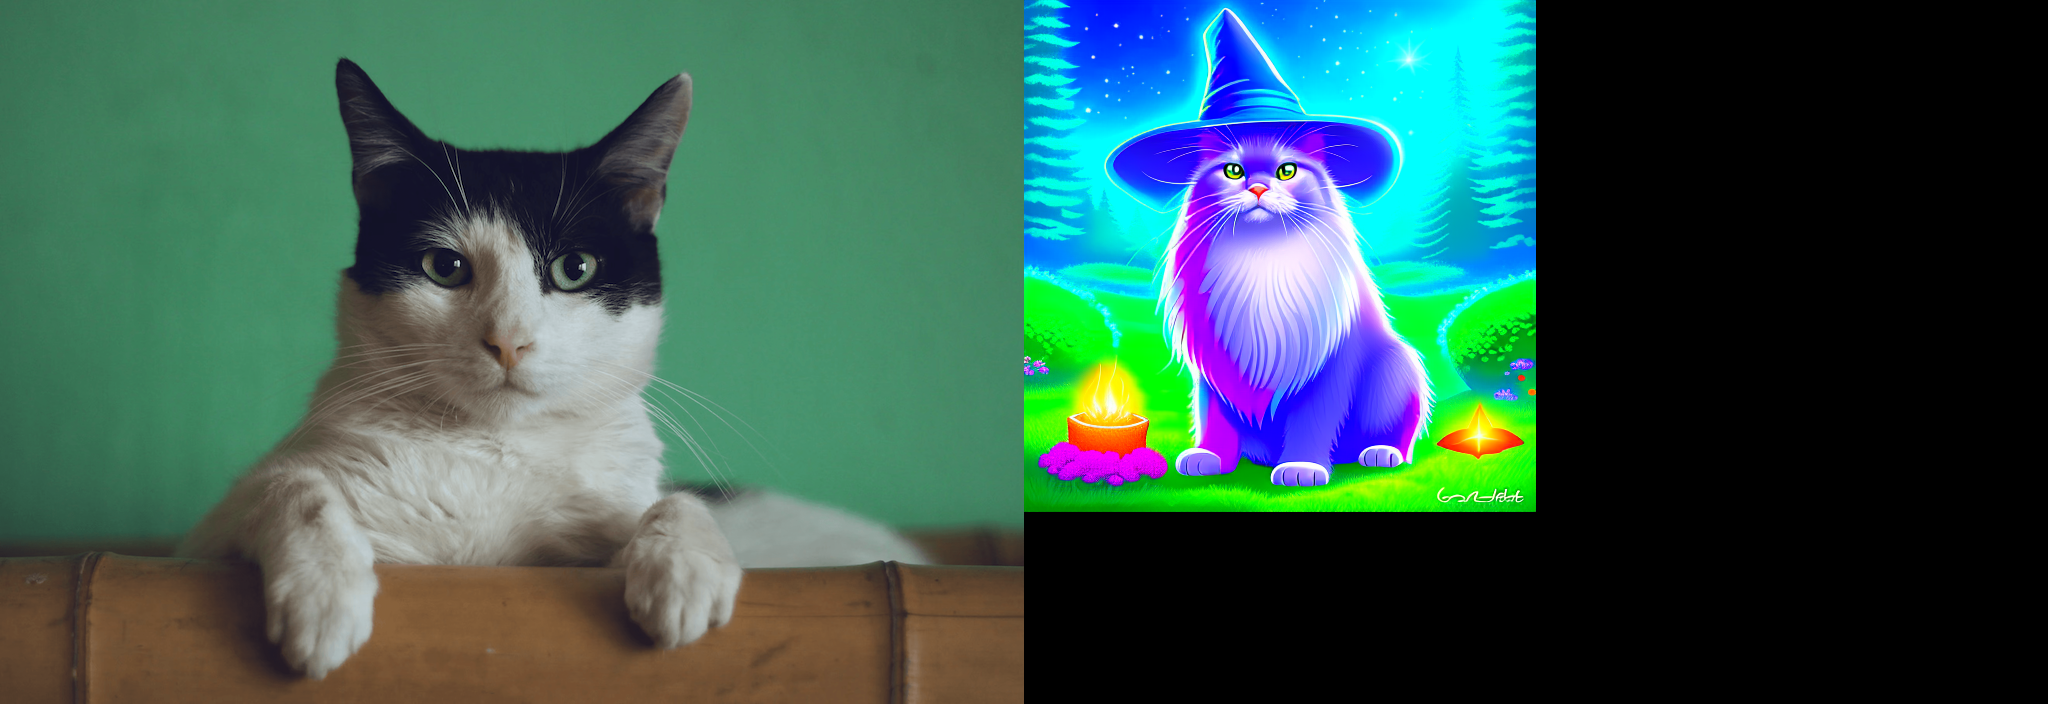

In [4]:
from diffusers.utils import make_image_grid

prompt = "cat wizard, gandalf, lord of the rings, detailed, fantasy, adorable, Disney, 8K"
negative_prompt="deformed, disfigured, poor details, bad anatomy"
image = pipeline(prompt, negative_prompt=negative_prompt, image=init_image, strength=0.5, guidance_scale=8.0).images[0]
make_image_grid([init_image, image.resize((512,512))], rows=1, cols=2)